<br>
   Description: Perform K-Means clustering on Handwritten digits dataset<br>
   Author: Krutarth Trivedi,  MS Robotics'23, WPI | ktrivedi@wpi.edu<br>
   OS: ubuntu 20.04 LTS<br>
   Software/Tools/Language: Python, Visual Studio Code</br>
   <br> Later imported to Jupyter Notebook<br>


In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics, manifold
import numpy as np
from scipy import ndimage

In [11]:
def performance_measure(y_set, y_pred):
    
    plot = metrics.ConfusionMatrixDisplay.from_predictions(y_set, y_pred)
    plot.figure_.suptitle("Confusion Matrix")
    plt.show()
    print(f"Confusion matrix:\n{plot.confusion_matrix}")
    FM_index = metrics.fowlkes_mallows_score(y_set, y_pred)
    print("Fowlkws - Mallows Index: ", FM_index)

In [12]:
def plot_print(X, Y, title):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(6, 4))
    for i in range(X.shape[0]):
        plt.text(
            X[i, 0],
            X[i, 1],
            str(Y[i]),
            color=plt.cm.nipy_spectral(model.labels_[i] / 10.0),
            fontdict={"weight": "bold", "size": 9},
        )
    plt.xticks([])
    plt.yticks([])
    plt.title(title,size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [13]:
n_cluster = 10
x, y = load_digits(return_X_y=True)
n_samples, n_features = x.shape
np.random.seed(0)

In [14]:
shift = lambda k: ndimage.shift(
        k.reshape((8, 8)), 0.3 * np.random.normal(size=2), mode="constant"
    ).ravel()
x = np.concatenate([x, np.apply_along_axis(shift, 1, x)])
y = np.concatenate([y, y], axis=0)
X_spectral = manifold.SpectralEmbedding(n_components=2).fit_transform(x)

In [15]:
model = KMeans(n_clusters = n_cluster,random_state= 10)

In [16]:
prediction = model.fit_predict(X_spectral)

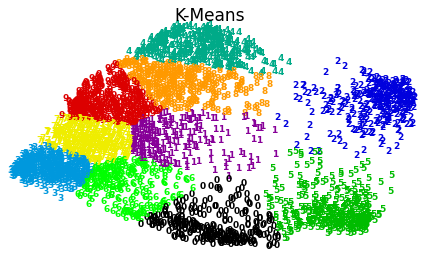

In [17]:
plot_print(X_spectral, prediction,'K-Means')

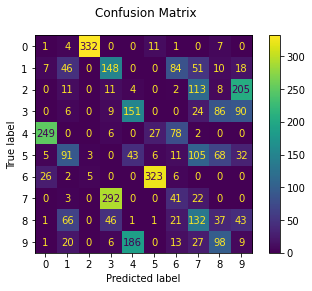

Confusion matrix:
[[  1   4 332   0   0  11   1   0   7   0]
 [  7  46   0 148   0   0  84  51  10  18]
 [  0  11   0  11   4   0   2 113   8 205]
 [  0   6   0   9 151   0   0  24  86  90]
 [249   0   0   6   0  27  78   2   0   0]
 [  5  91   3   0  43   6  11 105  68  32]
 [ 26   2   5   0   0 323   6   0   0   0]
 [  0   3   0 292   0   0  41  22   0   0]
 [  1  66   0  46   1   1  21 132  37  43]
 [  1  20   0   6 186   0  13  27  98   9]]
Fowlkws - Mallows Index:  0.4508943276825517


In [18]:
performance_measure(y, prediction)